# Часть 1. Проверка гипотезы в Python и составление аналитической записки

Мы предобработали данные в SQL, и теперь они готовы для проверки гипотезы в Python. Загрузим данные пользователей из Москвы и Санкт-Петербурга c суммой часов их активности из файла yandex_knigi_data.csv. 

Проверим наличие дубликатов в идентификаторах пользователей. Сравним размеры групп, их статистики и распределение.

Напомним, как выглядит гипотеза: пользователи из Санкт-Петербурга проводят в среднем больше времени за чтением и прослушиванием книг в приложении, чем пользователи из Москвы. Попробуйте статистически это доказать, используя одностороннюю проверку гипотезы с двумя выборками:

Нулевая гипотеза $H_0: \mu_{\text{СПб}} \leq \mu_{\text{Москва}}$ <br> Среднее время активности пользователей в Санкт-Петербурге не больше, чем в Москве.

Альтернативная гипотеза $H_1: \mu_{\text{СПб}} > \mu_{\text{Москва}}$ <br> Среднее время активности пользователей в Санкт-Петербурге больше, и это различие статистически значимо.

По результатам анализа данных подготовим аналитическую записку, в которой опишите:

Выбранный тип t-теста и уровень статистической значимости.

Результат теста, или p-value.

Вывод на основе полученного p-value, то есть интерпретацию результатов.

Одну или две возможные причины, объясняющие полученные результаты.

## Проверка гипотезы о пользователях приложения Яндекс.Книги из Санкт-Петербурга и Москвы.

- Автор:Кенжебеков Санат
- Дата:18.10.2025

## Цели и задачи проекта

<font color='#777778'>Цель проекта - проверить гипотезу: пользователи из Санкт-Петербурга проводят в среднем больше
времени за чтением и прослушиванием книг в приложении, чем пользователи из Москвы.

Задачи проекта: рассчитать параметры теста, оценить корректность его проведения и
проанализировать результаты эксперимента.</font>

## Описание данных

<font color='#777778'>Для анализа были использованы данные из файла yandex_knigi_data.csv, содержащего информацию об
активности пользователей в приложении для чтения и прослушивания книг:
- city - Город проживания пользователя (Санкт-Петербург или Москва)
- puid - Уникальный идентификатор пользователя
- hours - Суммарное время активности пользователя в приложении (в часах).</font>

## Содержимое проекта

<font color='#777778'>Основные этапы:
- Загрузка и знакомство с данными
- Предварительный анализ данных
- Проверка гипотезы в Python
- Составление аналитической записки.</font>

---

## 1. Загрузка данных и знакомство с ними

Загрузим данные пользователей из Москвы и Санкт-Петербурга c их активностью (суммой часов чтения и прослушивания) из файла `/datasets/yandex_knigi_data.csv`.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
from scipy.stats import ttest_ind
from scipy.stats import mannwhitneyu
import matplotlib.pyplot as plt
from statsmodels.stats.proportion import proportions_ztest

In [2]:
df = pd.read_csv('https://code.s3.yandex.net/datasets/yandex_knigi_data.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  8784 non-null   int64  
 1   city        8784 non-null   object 
 2   puid        8784 non-null   int64  
 3   hours       8784 non-null   float64
dtypes: float64(1), int64(2), object(1)
memory usage: 274.6+ KB


,Unnamed: 0,city,puid,hours
0,0,Москва,9668,26.167776
1,1,Москва,16598,82.111217
2,2,Москва,80401,4.656906
3,3,Москва,140205,1.840556
4,4,Москва,248755,151.326434


Датасет содержит 8784 строк и 4 столбца. После первичного знакомства с данными можно сделать
следующие выводы:
- Столбец city представлен уникальным типом данных object.
- Cтолбец hours - тип данных float.
- Пропусков в столбцах нет.
- Значения в столбцах Unnamed: 0, puid представлены типом данных int.

## Предварительный анализ данных

Проверим на дупликаты и количество уникальных пользователей приложения.

In [3]:
dublicates = df.duplicated().sum()
unique_id = df['puid'].nunique()
print (f' Найдено полных дубликатов: {dublicates},количество уникальных пользователей: {unique_id}')

 Найдено полных дубликатов: 0,количество уникальных пользователей: 8540


In [4]:
dublicates_2 = df.duplicated(subset=['puid']).sum()
print (f' Количество неявных дубликатов: {dublicates_2}.')

 Количество неявных дубликатов: 244.


Количество записей в датафрейме 8784, а количество уникальных пользователей 8540. Разница между эти значениями равна 244, что соотвествует количеству неявных дубликатов. Возможно, одни и те же пользователи присутствуют в обоих городах. Поэтому можем их удалить. 

In [5]:
cleaned_df = df.drop_duplicates(subset=['puid'], keep = 'first')
print (f' Количество строк после очистки: {len(cleaned_df)}')


 Количество строк после очистки: 8540


In [6]:
#Рассмотрим как распределяются пользователи по городам.

users_by_msk = cleaned_df['city'].value_counts()
users_by_spb = cleaned_df['city'].value_counts(normalize=True)
display(users_by_msk)
display(users_by_spb)

Москва             6234
Санкт-Петербург    2306
Name: city, dtype: int64

Москва             0.729977
Санкт-Петербург    0.270023
Name: city, dtype: float64

В Москве пользователей больше в три раза, чем в Санкт-Петербурге.

In [7]:
# Рассчитаем статистики по столбцу 'hours'.
stats = cleaned_df.groupby('city')['hours'].agg(
 count='count',
 mean='mean',
 max='max',
 min='min',
 median='median',
 std='std')

display(stats)

,count,mean,max,min,median,std
city,,,,,,
Москва,6234,10.881092,857.209373,0.000018,0.924498,36.851683
Санкт-Петербург,2306,11.264433,978.764775,0.000025,0.875355,39.831755


По таблице видно, что среднее сильно больше чем медиана. Это говорит о сильной правосторонней ассиметрии. Возможно есть тяжелые хвосты справа. Необходимо визуализировать распределения столбца 'hours'.


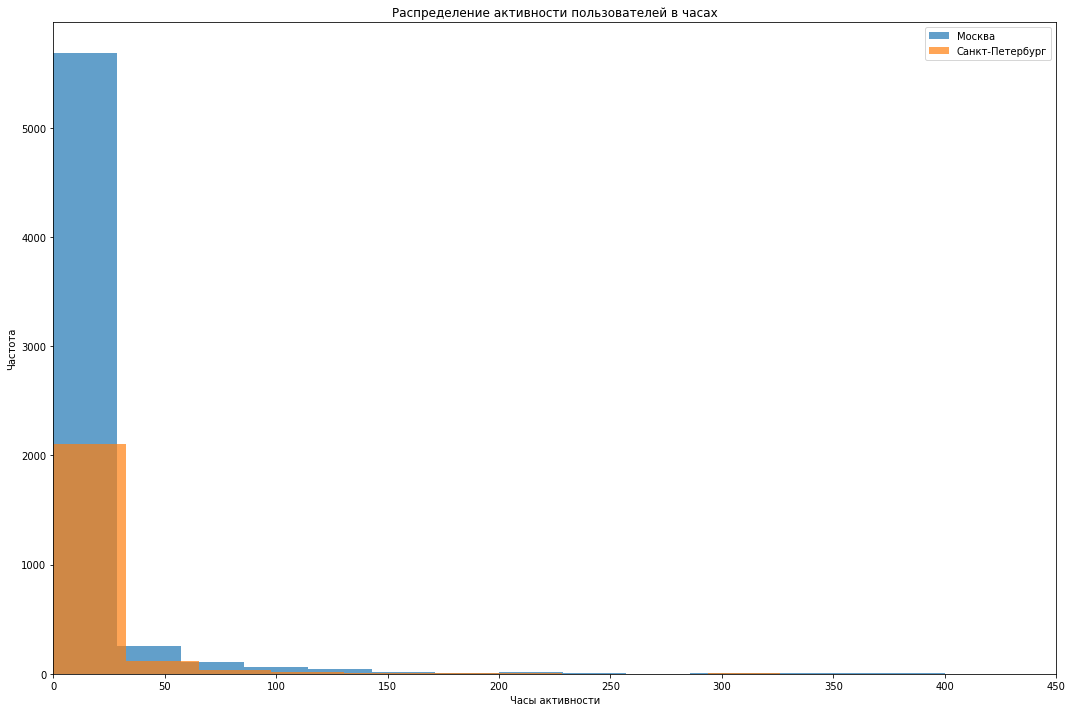

In [8]:
msk_hours = cleaned_df[cleaned_df['city'] == 'Москва']['hours']
spb_hours = cleaned_df[cleaned_df['city'] == 'Санкт-Петербург']['hours']

plt.figure(figsize=(15, 10))
plt.hist(msk_hours, bins=30, alpha=0.7, label='Москва')
plt.hist(spb_hours, bins=30, alpha=0.7, label='Санкт-Петербург')
plt.title('Распределение активности пользователей в часах')
plt.xlabel('Часы активности')
plt.ylabel('Частота')
plt.xlim(0, 450)

plt.legend()
plt.tight_layout()
plt.show()

__Анализ распределения данных по группам__

Объем данных: Выборка Москвы значительно превосходит Санкт-Петербург по количеству пользователей

Распределение: В обеих группах наблюдаются признаки асимметричного распределения с наличием выбросов

Ключевые метрики:
- Значительное расхождение между средним значением и медианой в обеих группах
- Высокие значения стандартного отклонения указывают на существенный разброс данных
- Наличие экстремальных значений (выбросов) в данных

Учитывая особенности распределения данных и наличие выбросов, для статистического сравнения групп целесообразно применить непараметрический тест Манна-Уитни, который более устойчив к нарушениям предположений о нормальности распределения и наличию аномальных значений.

Такой подход обеспечит более надежную и достоверную проверку гипотезы о различии времени активности пользователей между городами.

## 2. Проверка гипотезы в Python

Гипотеза звучит так: пользователи из Санкт-Петербурга проводят в среднем больше времени за чтением и прослушиванием книг в приложении, чем пользователи из Москвы. Попробуйте статистически это доказать, используя одностороннюю проверку гипотезы с двумя выборками:

- Нулевая гипотеза H₀: Средняя активность пользователей в часах в двух группах (Москва и Санкт-Петербург) не различается.

- Альтернативная гипотеза H₁: Средняя активность пользователей в Санкт-Петербурге больше, и это различие статистически значимо.

In [9]:
spb_hours = cleaned_df.loc[cleaned_df['city']=='Санкт-Петербург', 'hours']
msk_hours = cleaned_df.loc[cleaned_df['city']=='Москва', 'hours']

stat_mw, p_value = mannwhitneyu(spb_hours, msk_hours, alternative='greater')

print(f"p-value: {p_value:.4f}")

alpha = 0.05

if p_value < alpha:
 print("Отклоняем нулевую гипотезу: средняя активность пользователей из СПб больше - это статистически значимо")
else:
 print("Нет оснований отклонить нулевую гипотезу: данные не подтверждают, что средняя активность в СПб больше, чем в Мск")

p-value: 0.6190
Нет оснований отклонить нулевую гипотезу: данные не подтверждают, что средняя активность в СПб больше, чем в Мск


## Аналитическая записка по результатам статистического тестирования

__Методология исследования__

Для сравнения времени активности пользователей был применен непараметрический тест Манна-Уитни, что обусловлено асимметричным распределением данных и наличием выбросов в обеих выборках. Уровень статистической значимости установлен на стандартном значении α = 0,05.

__Результаты статистического теста__

P-value = 0,619, что существенно превышает установленный порог значимости 0,05.

__Статистический вывод__

На основании полученных результатов нет статистических оснований для отклонения нулевой гипотезы. Это означает, что не обнаружено значимых различий в средней продолжительности активности пользователей между Санкт-Петербургом и Москвой.

__Интерпретация результатов теста__

Культурно-поведенческие факторы:
- Схожий образ жизни и паттерны использования цифровых сервисов в двух столичных городах
- Одинаковые модели потребления контента (например, использование приложения в метро, во время поездок)

Рыночные и поведенческие аспекты:
- Возможная конкуренция с другими приложениями и платформами
- Сохранение популярности традиционных форматов (бумажные книги)
- Схожая структура целевой аудитории в обоих городах

Полученные результаты отражают реальное отсутствие различий в пользовательском поведении между двумя крупнейшими городами России, что свидетельствует о единообразии цифровых привычек в метрополиях.

----

# Часть 2. Анализ результатов A/B-тестирования

Теперь вам нужно проанализировать другие данные. Представьте, что к вам обратились представители интернет-магазина BitMotion Kit, в котором продаются геймифицированные товары для тех, кто ведёт здоровый образ жизни. У него есть своя целевая аудитория, даже появились хиты продаж: эспандер со счётчиком и напоминанием, так и подстольный велотренажёр с Bluetooth.

В будущем компания хочет расширить ассортимент товаров. Но перед этим нужно решить одну проблему. Интерфейс онлайн-магазина слишком сложен для пользователей — об этом говорят отзывы.

Чтобы привлечь новых клиентов и увеличить число продаж, владельцы магазина разработали новую версию сайта и протестировали его на части пользователей. По задумке, это решение доказуемо повысит количество пользователей, которые совершат покупку.

Ваша задача — провести оценку результатов A/B-теста. В вашем распоряжении:

* данные о действиях пользователей и распределении их на группы,

* техническое задание.

Оцените корректность проведения теста и проанализируйте его результаты.

## 1. Опишите цели исследования.



__Цель исследования__

Оценить эффективность нового, упрощенного интерфейса интернет-магазина BitMotion Kit, внедренного в рамках A/B-тестирования.

__Тестируемая гипотеза__

Упрощение пользовательского интерфейса приведет к увеличению конверсии зарегистрированных пользователей в покупателей на не менее 3 процентных пунктов в течение первой недели после регистрации.

## 2. Загрузите данные, оцените их целостность.


In [10]:
participants = pd.read_csv('https://code.s3.yandex.net/datasets/ab_test_participants.csv')
events = pd.read_csv('https://code.s3.yandex.net/datasets/ab_test_events.zip',
                     parse_dates=['event_dt'], low_memory=False)

In [11]:
display(participants.head())
display(participants.info())

,user_id,group,ab_test,device
0,0002CE61FF2C4011,B,interface_eu_test,Mac
1,001064FEAAB631A1,B,recommender_system_test,Android
2,001064FEAAB631A1,A,interface_eu_test,Android
3,0010A1C096941592,A,recommender_system_test,Android
4,001E72F50D1C48FA,A,interface_eu_test,Mac


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14525 entries, 0 to 14524
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  14525 non-null  object
 1   group    14525 non-null  object
 2   ab_test  14525 non-null  object
 3   device   14525 non-null  object
dtypes: object(4)
memory usage: 454.0+ KB


None

In [12]:
display(events.head())
display(events.info())

,user_id,event_dt,event_name,details
0,GLOBAL,2020-12-01 00:00:00,End of Black Friday Ads Campaign,ZONE_CODE15
1,CCBE9E7E99F94A08,2020-12-01 00:00:11,registration,0.0
2,GLOBAL,2020-12-01 00:00:25,product_page,NaN
3,CCBE9E7E99F94A08,2020-12-01 00:00:33,login,NaN
4,CCBE9E7E99F94A08,2020-12-01 00:00:52,product_page,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 787286 entries, 0 to 787285
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   user_id     787286 non-null  object        
 1   event_dt    787286 non-null  datetime64[ns]
 2   event_name  787286 non-null  object        
 3   details     249022 non-null  object        
dtypes: datetime64[ns](1), object(3)
memory usage: 24.0+ MB


None

In [13]:
#Проверим пропуски в таблице participants:
print(participants.isnull().sum())

user_id    0
group      0
ab_test    0
device     0
dtype: int64


In [14]:
#Проверим пропуски в таблице events:
print(events.isnull().sum())

user_id            0
event_dt           0
event_name         0
details       538264
dtype: int64


In [15]:
duplicates_part = participants.duplicated().sum()
print(f"Найдено дубликатов в participants: {duplicates_part}")
duplicates_events = events.duplicated().sum()
print(f"Найдено дубликатов в events: {duplicates_events}")

Найдено дубликатов в participants: 0
Найдено дубликатов в events: 36318


In [16]:
events = events.drop_duplicates()
duplicates_events_2 = events.duplicated().sum()
print(f"Найдено дубликатов в events: {duplicates_events_2}")

Найдено дубликатов в events: 0


Участники тестирования(participants)

Датасет содержит 14,525 уникальных участников A/B-теста с полной и корректной информацией по всем 4 текстовым полям.

Журнал событий(events)

Зафиксировано 787,286 событий, временная шкала которых корректно представлена в формате datetime. Основной массив данных не содержит детализации (68% пропусков в details), а повторяющиеся записи (36,318) были устранены в процессе предобработки.

## 3. По таблице `ab_test_participants` оцените корректность проведения теста:

   3\.1 Выделите пользователей, участвующих в тесте, и проверьте:

   - соответствие требованиям технического задания,

   - равномерность распределения пользователей по группам теста,

   - отсутствие пересечений с конкурирующим тестом (нет пользователей, участвующих одновременно в двух тестовых группах).

Для начала проверим не пересекаются ли пользователи в группах теста А и В. Удалим пересекающихся
пользователей, если таковые найдутся.

In [17]:
group_a = participants[participants['group'] == 'A']
a_multi_tests = group_a.groupby('user_id')['ab_test'].nunique()
a_problem_users = a_multi_tests[a_multi_tests > 1].index

print(f"Количество пользователей в группе A более чем в одном тесте: {len(a_problem_users)}")

participants_eu_clean_1 = participants[~participants['user_id'].isin(a_problem_users)]

print(f"Размер выборки после удаления проблемных пользователей: {participants_eu_clean_1.shape[0]}")

group_b = participants[participants['group'] == 'B']
b_multi_tests = group_b.groupby('user_id')['ab_test'].nunique()
b_problem_users = b_multi_tests[b_multi_tests > 1].index

print(f"Количество пользователей в группе B более чем в одном тесте: {len(b_problem_users)}")

participants_eu_clean_1 = participants[~participants['user_id'].isin(b_problem_users)]

print(f"Размер выборки после удаления проблемных пользователей: {participants_eu_clean_1.shape[0]}")

Количество пользователей в группе A более чем в одном тесте: 325
Размер выборки после удаления проблемных пользователей: 13875
Количество пользователей в группе B более чем в одном тесте: 116
Размер выборки после удаления проблемных пользователей: 14293


Проверка на чистоту теста.
Некоторые пользователи могли участвовать сразу в нескольких тестах одновременно.

- Найдем таких пользователей
- Удалим их из нашего теста
- Теперь работаем только с "чистыми" данными

Чтобы результаты теста не искажались - мы хотим видеть реакцию пользователей именно на наш новый интерфейс, а не на смесь разных изменений.

In [18]:
#Проверим есть ли пересечения между тестами
int_test = participants.query('ab_test == "interface_eu_test"')
rec_test = participants.query('ab_test == "recommender_system_test"')

tests_intersection = list(set(int_test.user_id) & set(rec_test.user_id))
print(f'Количество пересекающихся пользователей в обоих тестах: {len(tests_intersection)}')

Количество пересекающихся пользователей в обоих тестах: 887


In [19]:
int_test_clean = int_test[~int_test.user_id.isin(tests_intersection)]
print(f'Изначальный размер int_test: {len(int_test)}')
print(f'Размер после очистки int_test: {len(int_test_clean)}')
print(f'Очищено: {len(int_test) - len(int_test_clean)}')

tests_intersection_2 = set(int_test_clean.user_id) & set(rec_test.user_id)
print(f'Проверка на оставшиеся пересечения: {len(tests_intersection_2)}')

Изначальный размер int_test: 10850
Размер после очистки int_test: 9963
Очищено: 887
Проверка на оставшиеся пересечения: 0


In [20]:
#Посмотрим какие уникальные группы есть в очищенном датафрейме
participants_eu = int_test_clean
print(participants_eu['group'].unique())

['B' 'A']


In [21]:
#Проверим на дубликаты:
duplicates_eu = participants_eu['user_id'].duplicated().sum()
print(f"Найдено дубликатов в participants_eu:{duplicates_eu}")

Найдено дубликатов в participants_eu:0


In [22]:
#Проверим распределение по группам:
group_a = participants_eu[participants_eu['group'] == 'A']['user_id'].unique().shape[0]
group_b = participants_eu[participants_eu['group'] == 'B']['user_id'].unique().shape[0]
print(f' Уникальные пользователи в группе А: {group_a}')
print(f' Уникальные пользователи в группе B: {group_b}')
group_counts = participants_eu['group'].value_counts(normalize=True)
print(group_counts)

 Уникальные пользователи в группе А: 4952
 Уникальные пользователи в группе B: 5011
B    0.502961
A    0.497039
Name: group, dtype: float64


Распределение по группам почти одинаковое, что удовлетворяет условиям корректности проведения теста.

In [23]:
#Проверим распределение по устройствам
group_a_device = participants_eu[participants_eu['group'] == 'A'].groupby('device')['user_id'].count()
group_b_device = participants_eu[participants_eu['group'] == 'B'].groupby('device')['user_id'].count()

print(group_a_device)
print(group_b_device)

device
Android    2264
Mac         515
PC         1223
iPhone      950
Name: user_id, dtype: int64
device
Android    2218
Mac         511
PC         1302
iPhone      980
Name: user_id, dtype: int64


Распределение по устройствам почти одинаковое.

In [24]:
#Проверим пересечения:
int_group_a = set(participants_eu[participants_eu['group'] == 'A']['user_id'])
int_group_b = set(participants_eu[participants_eu['group'] == 'B']['user_id'])

intersect_users = int_group_a.intersection(int_group_b)

print(f"Пересекающихся пользователей: {len(intersect_users)}")

Пересекающихся пользователей: 0


Пересечений в группах не найдено. Проверка прошла корректно. Распределения в группах правильное.

3\.2 Проанализируйте данные о пользовательской активности по таблице `ab_test_events`:

- оставьте только события, связанные с участвующими в изучаемом тесте пользователями;

In [25]:
interface_eu_users = participants_eu[participants_eu['ab_test'] == 'interface_eu_test']['user_id']
interface_eu_events = events[events['user_id'].isin(interface_eu_users)]
print(f"Всего событий: {len(interface_eu_events)}")
print(interface_eu_events.head())

Всего событий: 68074
                user_id            event_dt    event_name details
64672  5F506CEBEDC05D30 2020-12-06 14:10:01  registration     0.0
64946  51278A006E918D97 2020-12-06 14:37:25  registration    -3.8
66585  A0C1E8EFAD874D8B 2020-12-06 17:20:22  registration   -3.32
67873  275A8D6254ACF530 2020-12-06 19:36:54  registration   -0.48
67930  0B704EB2DC7FCA4B 2020-12-06 19:42:20  registration     0.0


Событий в тесте 68074.

- определим горизонт анализа: рассчитайте время (лайфтайм) совершения события пользователем после регистрации и оставьте только те события, которые были выполнены в течение первых семи дней с момента регистрации;

План работы с данными:

Находим, когда каждый пользователь зарегистрировался

Для каждого события считаем, сколько дней прошло с регистрации

Отбираем только те события, которые случились в первые 7 дней

Цель: Проанализировать активность пользователей именно в течение пробного периода после регистрации.

In [26]:
# Преобразуем дату события в datetime
interface_eu_events['event_dt'] = pd.to_datetime(interface_eu_events['event_dt'])

# Находим дату регистрации для каждого пользователя (первое событие 'registration')
registration = interface_eu_events[interface_eu_events['event_name'] == 'registration'].groupby('user_id')['event_dt'].min().reset_index()
registration = registration.rename(columns={'event_dt': 'registration_dt'})

# Добавляем дату регистрации к основному датафрейму
interface_eu_events_reg = interface_eu_events.merge(registration, on='user_id', how='left')

# Считаем количество дней от регистрации до каждого события
interface_eu_events_reg['days_since_registration'] = (interface_eu_events_reg['event_dt'] - interface_eu_events_reg['registration_dt']).dt.days

# Оставляем только события, которые произошли в первые 7 дней после регистрации
events_7_days = interface_eu_events_reg[
    (interface_eu_events_reg['days_since_registration'] >= 0) &
    (interface_eu_events_reg['days_since_registration'] <= 6)
]

print(f"Событий в первые 7 дней после регистрации: {len(events_7_days)}")
print(f"Уникальных пользователей в первые 7 дней: {events_7_days['user_id'].nunique()}")

Событий в первые 7 дней после регистрации: 58692
Уникальных пользователей в первые 7 дней: 9963


/tmp/ipykernel_670/3001968610.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  interface_eu_events['event_dt'] = pd.to_datetime(interface_eu_events['event_dt'])


Оценим достаточность выборки для получения статистически значимых результатов A/B-теста. Заданные параметры:

- базовый показатель конверсии — 30%,

- мощность теста — 80%,

- достоверность теста — 95%,

- минимальный детектируемый эффект - 3%(абсолютный).

Для расчета выборки воспользуемся калькулятором Эвана Миллера (https://www.evanmiller.org/abtesting/sample-size.html).
Достаточный размер группы по калькулятору: 3 692 пользователя.
В нашем тесте количество уникальных пользователей в группе А: 4952, в группе B: 5011.
Выборка достаточна для проведенного теста.

- рассчитаем для каждой группы количество посетителей, сделавших покупку, и общее количество посетителей.

In [27]:
# Находим пользователей, которые совершили покупку в первые 7 дней
purchases = events_7_days[
    (events_7_days['user_id'].isin(interface_eu_users)) & 
    (events_7_days['event_name'] == 'purchase')  # Добавлено условие покупки
]

# Добавляем информацию о группе пользователя
purchases = purchases.merge(participants_eu[['user_id', 'group']], on='user_id', how='left')

# Считаем количество уникальных покупателей в каждой группе
buyers_per_group = purchases.groupby('group')['user_id'].nunique().reset_index(name='buyers')

# Считаем общее количество пользователей в каждой группе
total_per_group = participants_eu.groupby('group')['user_id'].nunique().reset_index(name='total_users')  # Исправлено название колонки

# Объединяем данные о покупателях и общем количестве пользователей
summary = buyers_per_group.merge(total_per_group, on='group')

# Рассчитываем конверсию для каждой группы
summary['conversion'] = (summary['buyers'] / summary['total_users']).round(3)

print("Конверсия по группам:")
print(summary)

Конверсия по группам:
  group  buyers  total_users  conversion
0     A    1377         4952       0.278
1     B    1480         5011       0.295


- сделаем предварительный общий вывод об изменении пользовательской активности в тестовой группе по сравнению с контрольной.

In [28]:
conver_A = summary.loc[summary['group'] == 'A', 'conversion'].values[0]
conver_B = summary.loc[summary['group'] == 'B', 'conversion'].values[0]
conver_change = (conver_B - conver_A)*100
conver_change_1 = (conver_B - conver_A)/ conver_A*100
print(f"Рост конверсии в абсолютном значении: {conver_change:.2f} п.п.")
print(f"Рост конверсии в относительном значении: {conver_change_1:.2f}%")

Рост конверсии в абсолютном значении: 1.70 п.п.
Рост конверсии в относительном значении: 6.12%


Тестовая группа показала рост конверсии на 1.7 п.п. (с 27.8% до 29.5%), но этого недостаточно для достижения целевого значения +3 п.п. Необходима проверка статистической значимости результатов перед принятием решения о внедрении.

## 4. Оценка результатов A/B-тестирования:

- Проверим изменение конверсии подходящим статистическим тестом, учитывая все этапы проверки гипотез.

Поскольку требуется проверить конверсию (долевой показатель) на независимых выборках, то
используем Z-тест. 

Уровень значимости примем стандартным alpha = 0.05.

__Cформулируем гипотезы:__

Нулевая гипотеза H₀: Конверсия в группе B не выше, чем в группе A.

Альтернативная гипотеза H₁: Конверсия в группе B выше, чем в группе A.

In [29]:
buy = summary.sort_values('group', ascending=False)['buyers'].values
all = summary.sort_values('group', ascending=False)['total_users'].values
stat_ztest, p_value_ztest = proportions_ztest(buy, all, alternative='larger')
print(f"p-value: {p_value_ztest:.3f}")
alpha = 0.05
if p_value_ztest < alpha:
 print("Отклоняем H0: Конверсия в группе B статистически значимо выше.")
else:
 print("Нет оснований отклонить H0: статистически значимых различий нет.")

p-value: 0.028
Отклоняем H0: Конверсия в группе B статистически значимо выше.


- Опишем выводы по проведённой оценке результатов A/B-тестирования. Что можно сказать про результаты A/B-тестирования? Был ли достигнут ожидаемый эффект в изменении конверсии?

### Отчет о результатах A/B-теста нового интерфейса

__Результаты конверсии__
Группа	Конверсия	Изменение
Контрольная (A)	27.8%	-
Тестовая (B)	29.5%	+1.7 п.п.

__Статистический анализ__
P-value: 0.028 ✓

Уровень значимости: 0.05

Статус: Статистически значимое улучшение

Вывод: Конверсия в группе B достоверно выше, чем в группе A.

__Соответствие целям проекта__
Параметр	План	Факт	Соответствие
Прирост конверсии	+3 п.п.	+1.7 п.п.	Не достигнуто 

__Рекомендации:__
- Не внедрять новый интерфейс по следующим причинам:

- Целевой показатель прироста не достигнут (57% от плана)

- Условия технического задания не выполнены

__Дальнейшие действия__

Обсудить с заказчиком:
- Статистически значимый, но недостаточный прирост
- Положительная динамика требует дополнительной оптимизации

Варианты развития:
- Увеличить выборку для следующего теста
- Продлить длительность эксперимента
- Доработать интерфейс для усиления эффекта

__Итог__

Новый интерфейс показывает статистически значимое улучшение, но не соответствует целевым показателям. Требуется дополнительная работа для достижения KPI.